<a href="https://colab.research.google.com/github/KISHANJB/Sign-Language-Recognition/blob/main/5ISLsoftmax515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [ ]:
train_dir=r'/content/drive/MyDrive/500'
#test_dir=r'/content/Test'
#val_dir=r'/content/Validation'

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(train_dir,batch_size=32)
#data_test=tf.keras.utils.image_dataset_from_directory(test_dir,batch_size=100,image_size=(128,128))
#data_val=tf.keras.utils.image_dataset_from_directory(val_dir,batch_size=100,image_size=(128,128))

Found 5169 files belonging to 10 classes.


In [ ]:
data_iterator=data_train.as_numpy_iterator()
batch=data_iterator.next()
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0][0].shape

(256, 256, 3)

In [ ]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


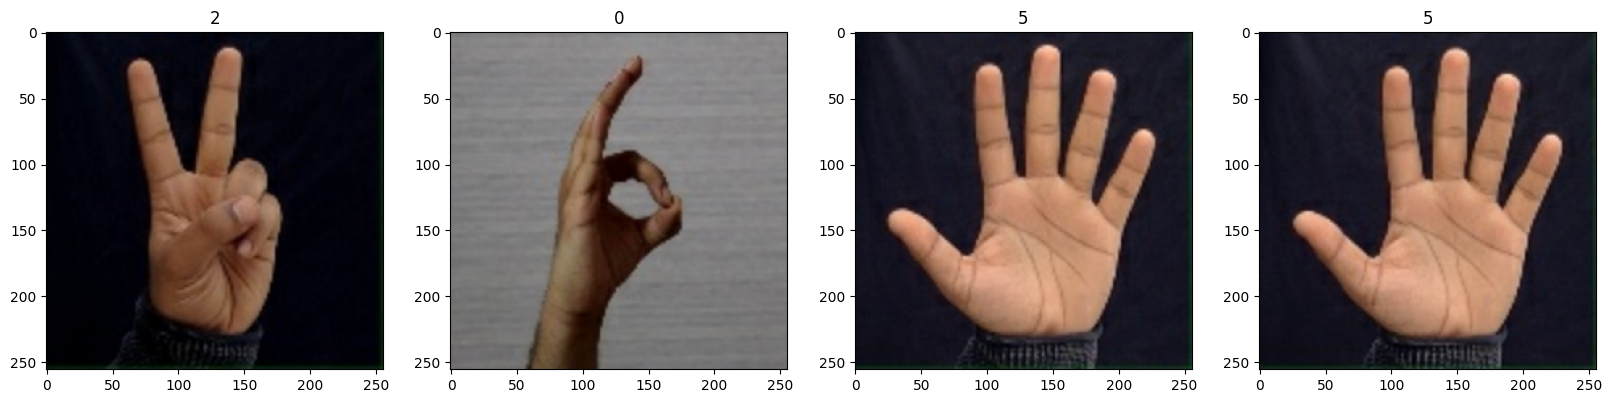

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data_train.map(lambda x,y: (x/255, y))


In [ ]:
print(data.as_numpy_iterator().next()[0].min())
print(data.as_numpy_iterator().next()[0].max())
scaled=data.as_numpy_iterator().next()


0.0
1.0


In [ ]:
scaled[0].shape

(32, 256, 256, 3)

In [ ]:
scaled[1].shape

(32,)

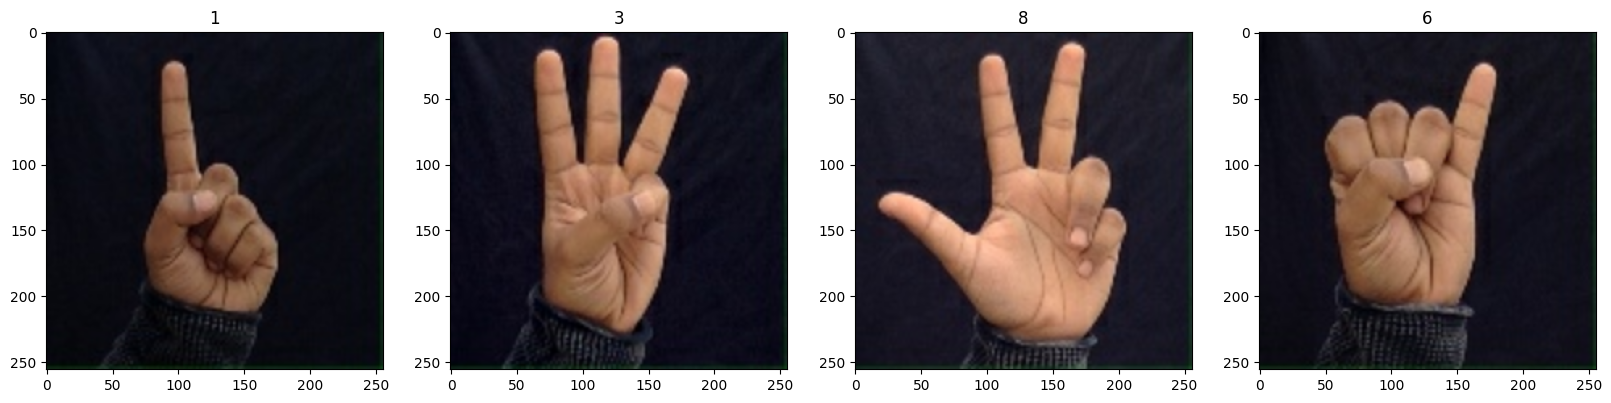

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled[1][idx])

In [ ]:
len(data_train)

162

In [ ]:
train_size=int(len(data)*.8)
val_size=int(len(data)*.2)
#test_size=int(len(data)*.1)
len(data)

162

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
print(scaled[0].shape)
print(scaled[0][1].shape)

(32, 256, 256, 3)
(256, 256, 3)


In [ ]:
logdir='ISLlogs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = 20, validation_data =val , verbose = 1)
hist = model.fit(train,epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
129/129 [==============================] - 530s 4s/step - loss: 0.0833 - accuracy: 0.9789 - val_loss: 3.0611e-05 - val_accuracy: 1.0000
Epoch 2/5
129/129 [==============================] - 343s 3s/step - loss: 1.5700e-05 - accuracy: 1.0000 - val_loss: 9.5272e-06 - val_accuracy: 1.0000
Epoch 3/5
129/129 [==============================] - 334s 3s/step - loss: 6.4892e-06 - accuracy: 1.0000 - val_loss: 5.4059e-06 - val_accuracy: 1.0000
Epoch 4/5
129/129 [==============================] - 333s 3s/step - loss: 3.6195e-06 - accuracy: 1.0000 - val_loss: 3.4073e-06 - val_accuracy: 1.0000
Epoch 5/5
129/129 [==============================] - 332s 3s/step - loss: 2.4162e-06 - accuracy: 1.0000 - val_loss: 2.3909e-06 - val_accuracy: 1.0000


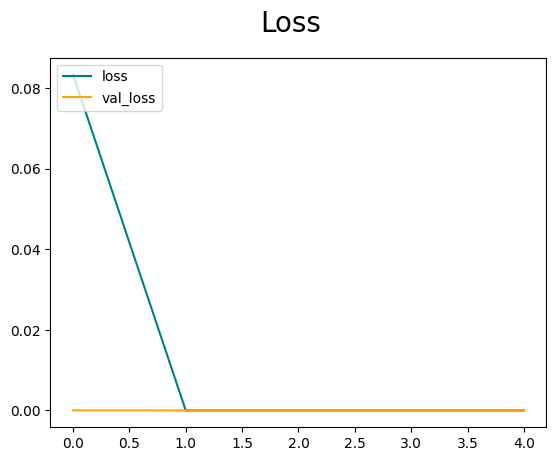

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

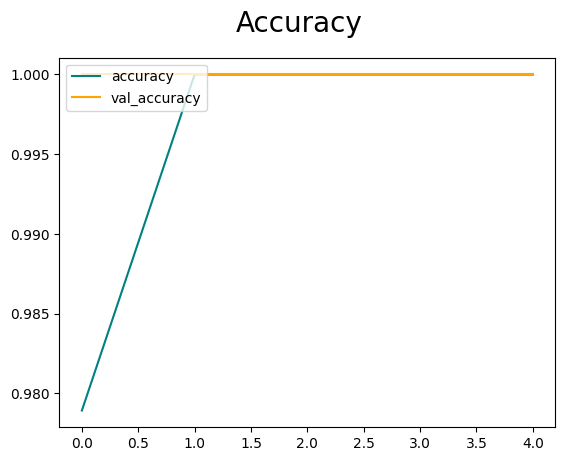

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 1s 788ms/step


ValueError: ignored

In [ ]:
from PIL import Image

# Loading the image
image = Image.open('/content/test 7.jfif')

# Specifying the RGB mode to the image
image = image.convert('RGB')

# Converting an image from PNG to JPG format
image.save("converted-jpg-image.jpg")

SyntaxError: ignored

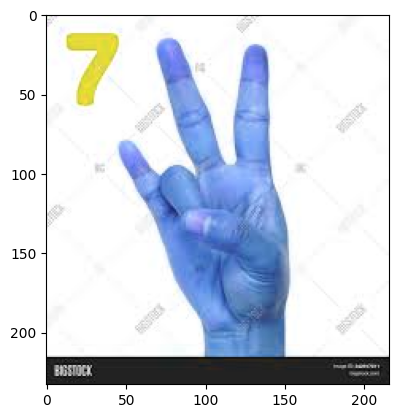

error: ignored

In [ ]:
import cv2
img = cv2.imread('/content/test 7.jfif')
plt.imshow(img)
plt.show()
img1=cv2.imwrite('/content/test 7.jpeg')

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','5ISLsoftmax515.h5'))
#new_model = load_model('ISLclassifier.h5')
#new_model = load_model('ISLclassifier.h5')

In [ ]:
import os
import uuid
import flask
import urllib
from PIL import Image
from tensorflow.keras.models import load_model
from flask import Flask , render_template  , request , send_file
from tensorflow.keras.preprocessing.image import load_img , img_to_array

app = Flask("ISL Classifier")
moloc =os.path.join('/content/5ISLsoftmax515.h5')
model = load_model(moloc)


ALLOWED_EXT = set(['jpg' , 'jpeg' , 'png' , 'jfif'])
def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1] in ALLOWED_EXT

classes = ['0' ,'1', '2' , '3' , '4' ,'5' ,'6', '7' ,'8' ,'9']


def predict(filename , model):
    img = load_img(filename , target_size = (128 , 128))
    img = img_to_array(img)
    #img = img.reshape(1 , 32 ,32 ,3)

    img = img.astype('float32')
    img = img/255.0
    result = model.predict(img)

    dict_result = {}
    for i in range(10):
        dict_result[result[0][i]] = classes[i]

    res = result[0]
    res.sort()
    res = res[::-1]
    prob = res[:3]

    prob_result = []
    class_result = []
    for i in range(3):
        prob_result.append((prob[i]*100).round(2))
        class_result.append(dict_result[prob[i]])

    return class_result , prob_result




@app.route('/')
def home():
        return render_template("index.html")

@app.route('/success' , methods = ['GET' , 'POST'])
def success():
    error = ''
    target_img = os.path.join(os.getcwd() , 'static/images')
    if request.method == 'POST':
        if(request.form):
            link = request.form.get('link')
            try :
                resource = urllib.request.urlopen(link)
                unique_filename = str(uuid.uuid4())
                filename = unique_filename+".jpg"
                img_path = os.path.join(target_img , filename)
                output = open(img_path , "wb")
                output.write(resource.read())
                output.close()
                img = filename

                class_result , prob_result = predict(img_path , model)

                predictions = {
                        "class1":class_result[0],
                        "class2":class_result[1],
                        "class3":class_result[2],
                        "class4":class_result[3],
                        "class5":class_result[4],
                        "class6":class_result[5],
                        "class7":class_result[6],
                        "class8":class_result[7],
                        "class9":class_result[8],
                        "class10":class_result[9],
                        "prob1": prob_result[0],
                        "prob2": prob_result[1],
                        "prob3": prob_result[2],
                        "prob4": prob_result[3],
                        "prob5": prob_result[4],
                        "prob6": prob_result[5],
                        "prob7": prob_result[6],
                        "prob8": prob_result[7],
                        "prob9": prob_result[8],
                        "prob10":prob_result[9],
                }

            except Exception as e :
                print(str(e))
                error = 'This image from this site is not accesible or inappropriate input'

            if(len(error) == 0):
                return  render_template('success.html' , img  = img , predictions = predictions)
            else:
                return render_template('index.html' , error = error)


        elif (request.files):
            file = request.files['file']
            if file and allowed_file(file.filename):
                file.save(os.path.join(target_img , file.filename))
                img_path = os.path.join(target_img , file.filename)
                img = file.filename

                class_result , prob_result = predict(img_path , model)

                predictions = {
                        "class1":class_result[0],
                        "class2":class_result[1],
                        "class3":class_result[2],
                        "class4":class_result[3],
                        "class5":class_result[4],
                        "class6":class_result[5],
                        "class7":class_result[6],
                        "class8":class_result[7],
                        "class9":class_result[8],
                        "class10":class_result[9],
                        "prob1": prob_result[0],
                        "prob2": prob_result[1],
                        "prob3": prob_result[2],
                        "prob4": prob_result[3],
                        "prob5": prob_result[4],
                        "prob6": prob_result[5],
                        "prob7": prob_result[6],
                        "prob8": prob_result[7],
                        "prob9": prob_result[8],
                        "prob10":prob_result[9],

                }

            else:
                error = "Please upload images of jpg , jpeg and png extension only"

            if(len(error) == 0):
                return  render_template('success.html' , img  = img , predictions = predictions)
            else:
                return render_template('index.html' , error = error)

    else:
        return render_template('index.html')

if __name__ == "__main__":
    app.run(debug = True)

 * Serving Flask app 'ISL Classifier'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
